In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
%matplotlib notebook

import starfish
from starfish.types import Indices
from showit import image

In [7]:
ls /Users/ambrosecarr/Desktop/

DARTFISH/     MERFISH/      allen_smFISH/
ISS/          MERFISH_TEST/ osmFISH/


In [8]:
experiment = starfish.Experiment.from_json('/Users/ambrosecarr/Desktop/ISS/fov_001/experiment.json')

100%|██████████| 1/1 [00:00<00:00, 140.09it/s]


In [9]:
projection = experiment.image.max_proj(Indices.CH, Indices.ROUND, Indices.Z)

<IPython.core.display.Javascript object>


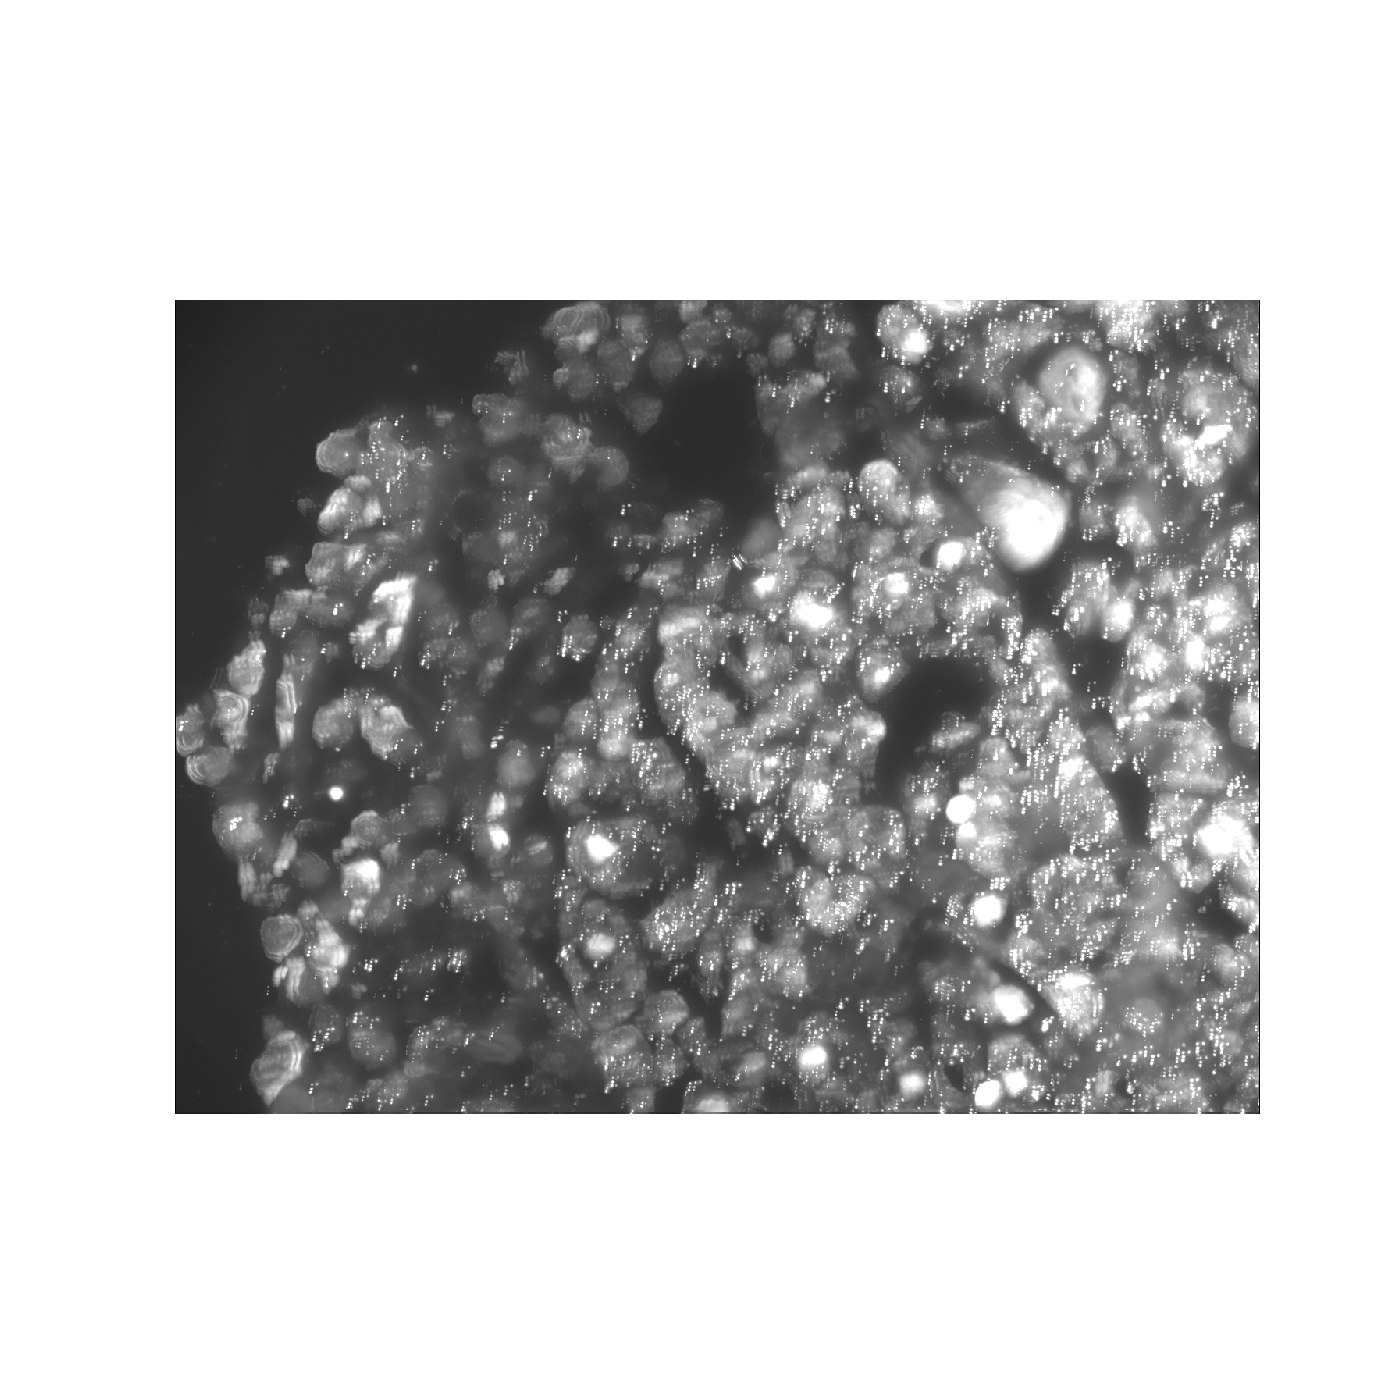

In [10]:
image(projection)

In [12]:
experiment.image.shape

OrderedDict([(<Indices.ROUND: 'r'>, 4),
             (<Indices.CH: 'c'>, 4),
             (<Indices.Z: 'z'>, 1),
             ('y', 1044),
             ('x', 1390)])

<IPython.core.display.Javascript object>


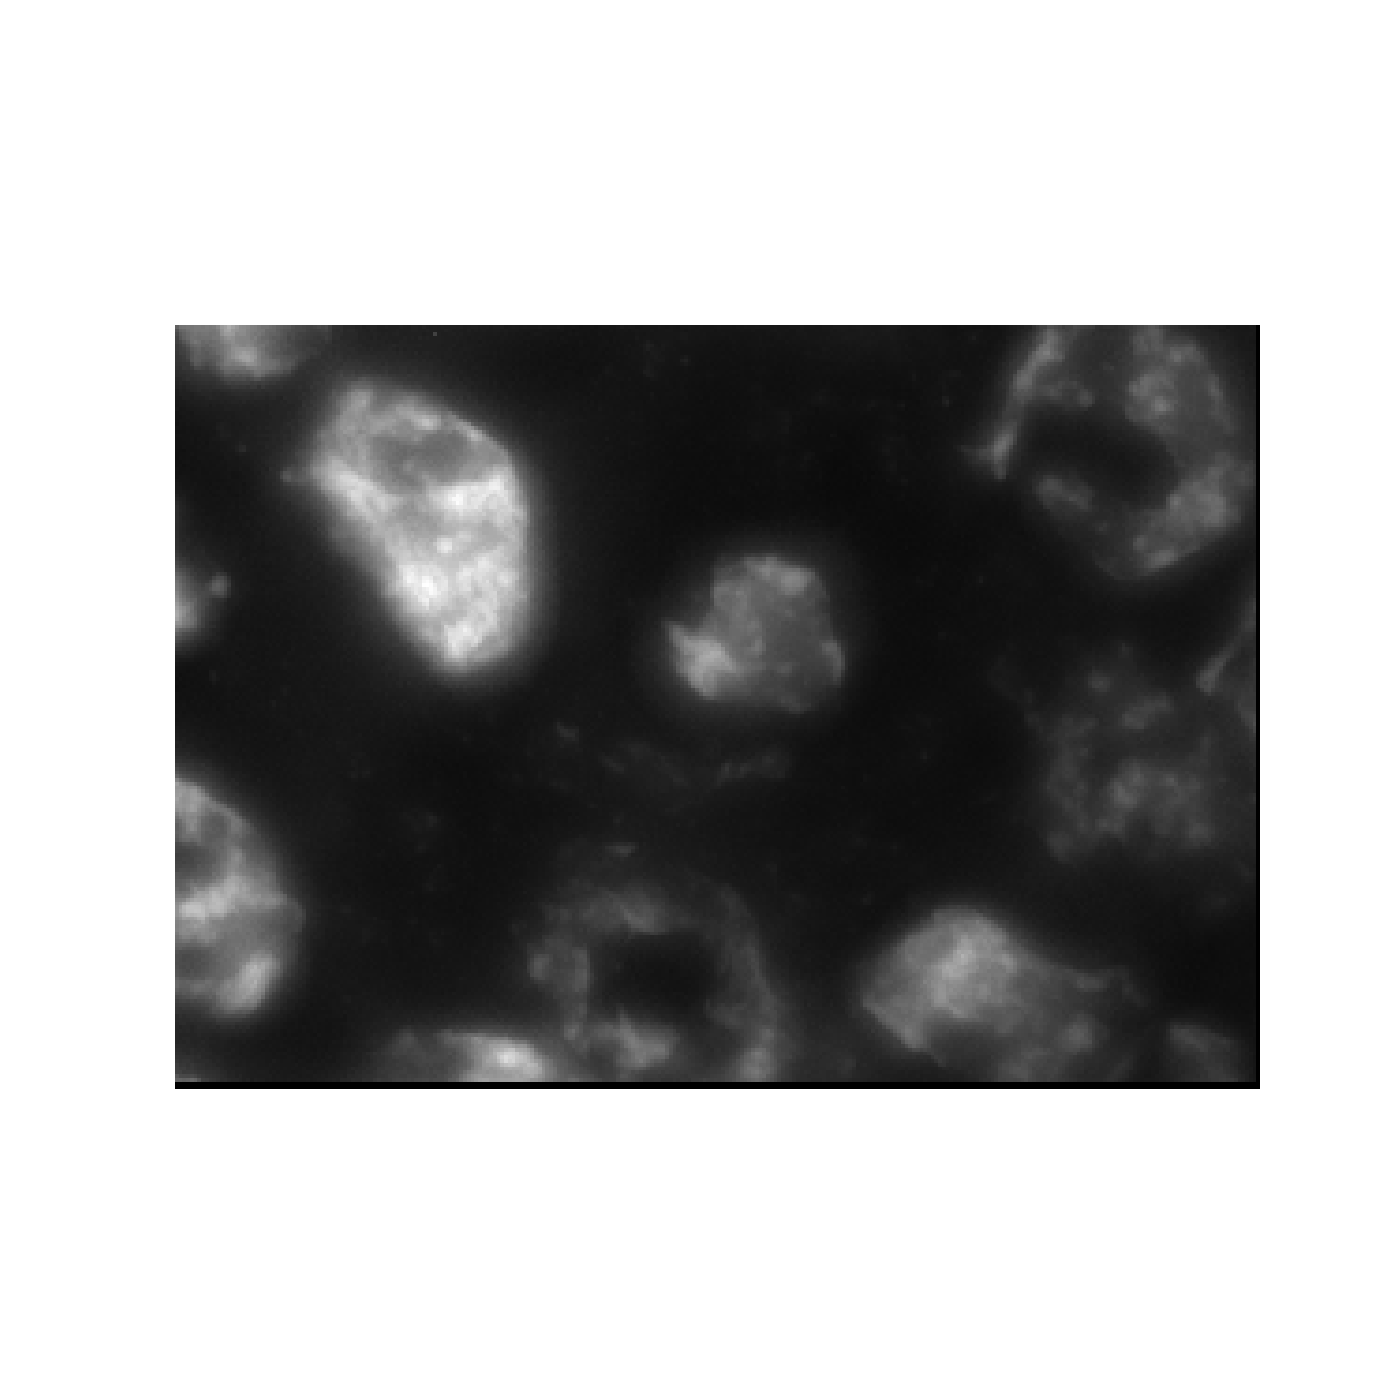

In [19]:
nuc_proj = experiment.auxiliary_images['nuclei'].max_proj(Indices.CH, Indices.ROUND, Indices.Z)
image(nuc_proj[840:, 1100:])

<IPython.core.display.Javascript object>


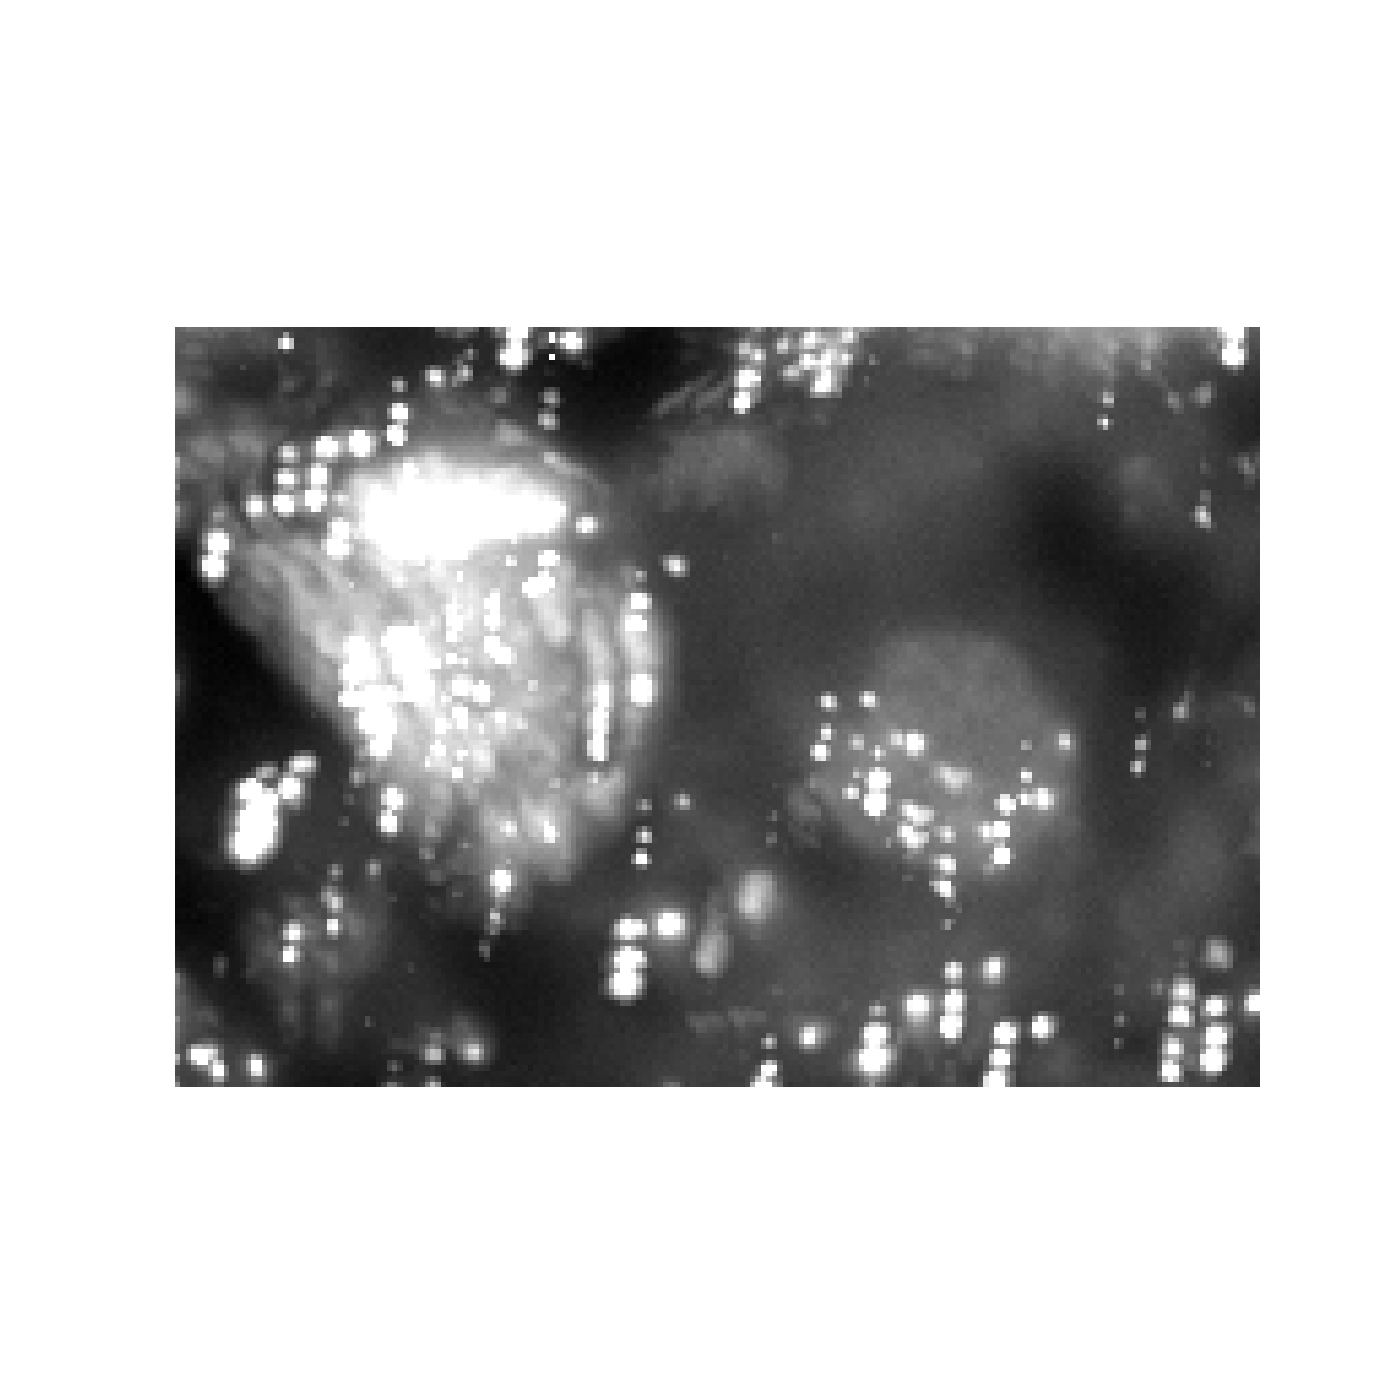

In [25]:
image(projection[840:980, 1100:1300])

In [26]:
test_data = experiment.image._data[:, :, :, 840:980, 1100:1300]
test_stack = starfish.ImageStack.from_numpy_array(test_data)

nuclei_stack = experiment.auxiliary_images['nuclei']._data[:, :, :, 840:980, 1100:1300]
test_nuclei_stack = starfish.ImageStack.from_numpy_array(nuclei_stack)

dots_stack = experiment.auxiliary_images['dots']._data[:, :, :, 840:980, 1100:1300]
test_dots_stack = starfish.ImageStack.from_numpy_array(dots_stack)

100%|██████████| 1/1 [00:00<00:00, 3118.44it/s]


In [27]:
import json

def update_version_to_1_0_0(json_file: str):
    with open(json_file, 'rb') as frd:
        data = json.load(frd)
    data['version'] = '1.0.0'
    print(data)
    with open(json_file, 'w') as fwd:
        data = json.dump(data, fwd)

In [28]:
!mkdir -p /Users/ambrosecarr/Desktop/ISS_TEST/fov_001

In [29]:
iss_test_stack = '/Users/ambrosecarr/Desktop/ISS_TEST/fov_001/hybridization.json'
test_stack.write(iss_test_stack)

In [41]:
nuclei_test_stack = '/Users/ambrosecarr/Desktop/ISS_TEST/fov_001/nuclei.json'
test_nuclei_stack.write(nuclei_test_stack)

In [42]:
dots_test_stack = '/Users/ambrosecarr/Desktop/ISS_TEST/fov_001/dots.json'
test_dots_stack.write(dots_test_stack)

In [32]:
def create_experiment_json(new_directory, original_experiment, original_codebook):
    shutil.copy(original_experiment, new_directory)
    shutil.copy(original_codebook, new_directory)

In [33]:
create_experiment_json(
    os.path.split(iss_test_stack)[0], 
    '/Users/ambrosecarr/Desktop/ISS/fov_001/experiment.json',
    '/Users/ambrosecarr/Desktop/ISS/fov_001/codebook.json'
)

In [38]:
ls /Users/ambrosecarr/Desktop/ISS_TEST/fov_001/

codebook.json                     hybridization-X0-Y0-Z0-H2-C0.npy
dots-X0-Y0-Z0-H0-C0.npy           hybridization-X0-Y0-Z0-H2-C1.npy
dots-X0-Y0-Z0-H0-C1.npy           hybridization-X0-Y0-Z0-H2-C2.npy
dots-X0-Y0-Z0-H0-C2.npy           hybridization-X0-Y0-Z0-H2-C3.npy
dots-X0-Y0-Z0-H0-C3.npy           hybridization-X0-Y0-Z0-H3-C0.npy
dots-X0-Y0-Z0-H1-C0.npy           hybridization-X0-Y0-Z0-H3-C1.npy
dots-X0-Y0-Z0-H1-C1.npy           hybridization-X0-Y0-Z0-H3-C2.npy
dots-X0-Y0-Z0-H1-C2.npy           hybridization-X0-Y0-Z0-H3-C3.npy
dots-X0-Y0-Z0-H1-C3.npy           hybridization.json
dots-X0-Y0-Z0-H2-C0.npy           nuclei-X0-Y0-Z0-H0-C0.npy
dots-X0-Y0-Z0-H2-C1.npy           nuclei-X0-Y0-Z0-H0-C1.npy
dots-X0-Y0-Z0-H2-C2.npy           nuclei-X0-Y0-Z0-H0-C2.npy
dots-X0-Y0-Z0-H2-C3.npy           nuclei-X0-Y0-Z0-H0-C3.npy
dots-X0-Y0-Z0-H3-C0.npy           nuclei-X0-Y0-Z0-H1-C0.npy
dots-X0-Y0-Z0-H3-C1.npy           nuclei-X0-Y0-Z0-H1-C1.npy

dots-X0-Y0-Z0-H3-C3.npy           nuclei-X0-Y0-Z0-

In [39]:
test_experiment = starfish.Experiment.from_json('/Users/ambrosecarr/Desktop/ISS_TEST/fov_001/experiment.json')

100%|██████████| 16/16 [00:00<00:00, 600.26it/s]


<IPython.core.display.Javascript object>


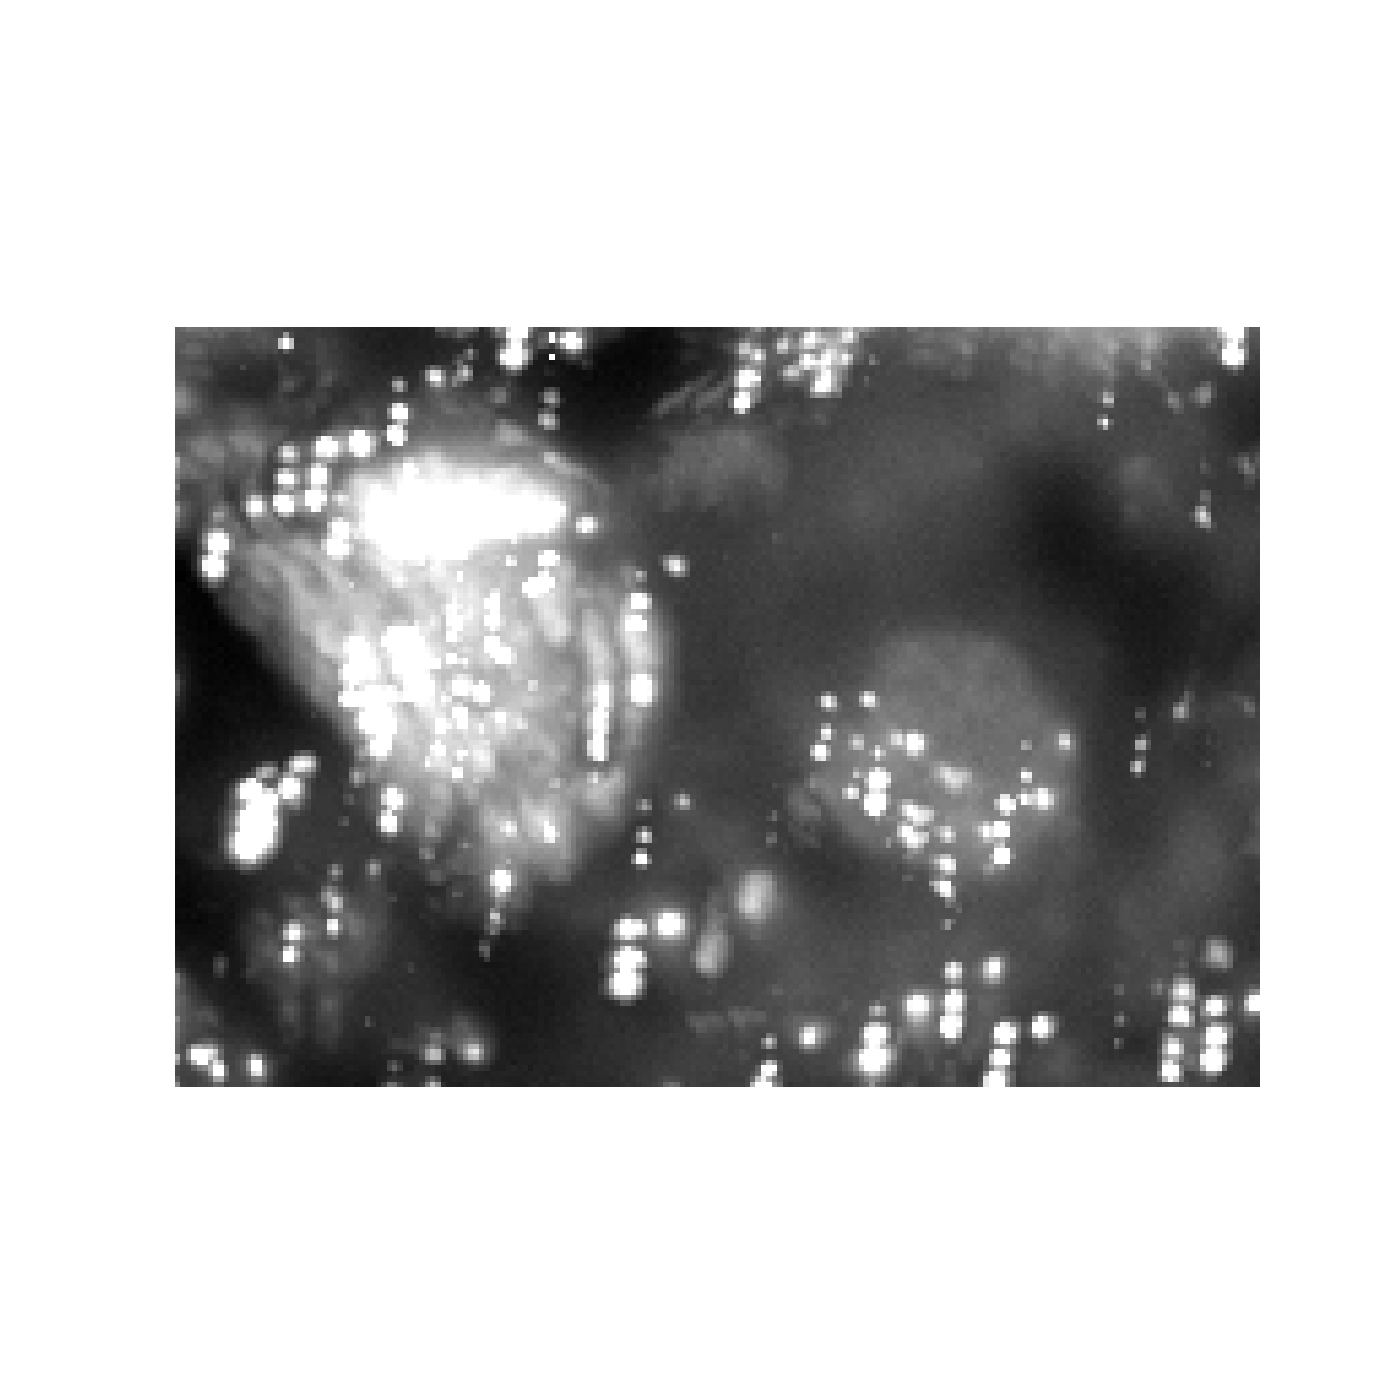

In [40]:
image(test_experiment.image.max_proj(Indices.CH, Indices.ROUND, Indices.Z))